In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
%matplotlib inline

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
# Construct a linear model
pred = tf.add(tf.mul(X, W), b)

In [7]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# Initializing the variables
init = tf.initialize_all_variables()

Epoch: 0050 cost= 0.874781370 W= 0.748635 b= -2.78861
Epoch: 0100 cost= 0.782664180 W= 0.718955 b= -2.57508
Epoch: 0150 cost= 0.701179624 W= 0.691039 b= -2.37426
Epoch: 0200 cost= 0.629104495 W= 0.664784 b= -2.18539
Epoch: 0250 cost= 0.565350115 W= 0.640092 b= -2.00775
Epoch: 0300 cost= 0.508954525 W= 0.616867 b= -1.84067
Epoch: 0350 cost= 0.459070742 W= 0.595023 b= -1.68353
Epoch: 0400 cost= 0.414944261 W= 0.574478 b= -1.53573
Epoch: 0450 cost= 0.375913769 W= 0.555156 b= -1.39673
Epoch: 0500 cost= 0.341388762 W= 0.536983 b= -1.26599
Epoch: 0550 cost= 0.310849786 W= 0.519891 b= -1.14303
Epoch: 0600 cost= 0.283837497 W= 0.503815 b= -1.02738
Epoch: 0650 cost= 0.259943455 W= 0.488695 b= -0.918613
Epoch: 0700 cost= 0.238808349 W= 0.474474 b= -0.816311
Epoch: 0750 cost= 0.220113903 W= 0.4611 b= -0.720094
Epoch: 0800 cost= 0.203578204 W= 0.448521 b= -0.629601
Epoch: 0850 cost= 0.188951895 W= 0.43669 b= -0.544489
Epoch: 0900 cost= 0.176014557 W= 0.425562 b= -0.464438
Epoch: 0950 cost= 0.16457

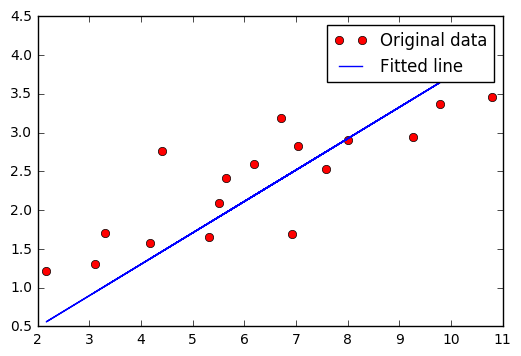

In [9]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()